#### Best Contributing Features For Passenger Satisfaction

#### 1. Using Fielter Method

#### 1.1 Mutual Information

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# ---- Step 1: Load Data ----
data = pd.read_csv("scaled_dataset.csv")  # Ensure this dataset is preprocessed and scaled

# ---- Step 2: Define Features and Target ----
X = data.drop("Satisfaction_Satisfied", axis=1)  # Features
y = data["Satisfaction_Satisfied"]               # Target

# ---- Step 3: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 4: Mutual Information Feature Selection ----
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)

# Create a DataFrame of scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# ---- Step 5: Display Top Features ----
print("Top 10 Contributing Features Based on Mutual Information:")
print(mi_df.head(10))

Top 10 Contributing Features Based on Mutual Information:
                            Feature  MI Score
17   Type of Travel_Personal Travel  0.101296
18                        Class_Eco  0.085441
0                               Age  0.039825
16  Customer Type_disloyal Customer  0.020751
19                    Class_Leisure  0.008305
15                      Gender_Male  0.006034
6                  Boarding Service  0.004422
11              Call Center Service  0.002456
12                  Departure Delay  0.002414
13                      Total Delay  0.001972


#### Plot Feature Importance

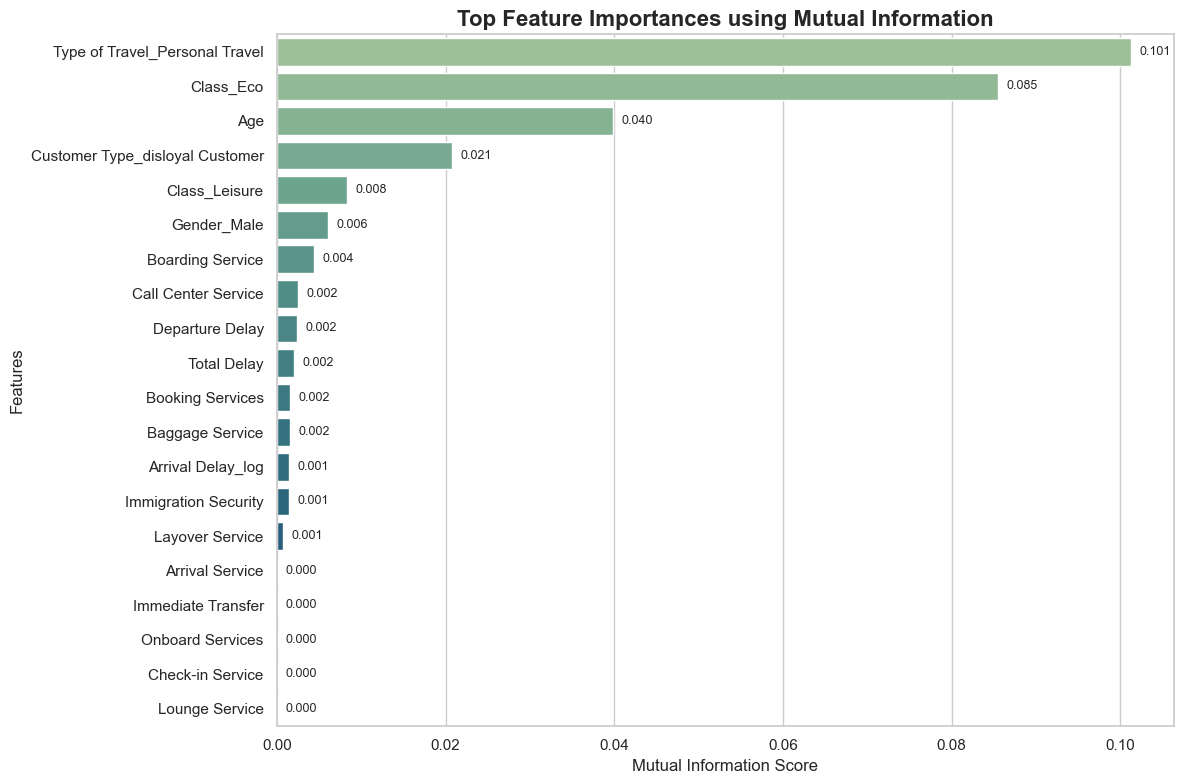

In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# ---- Step 6: Enhanced Plot Feature Importance ----
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Barplot with annotations
ax = sns.barplot(
    x="MI Score", y="Feature", data=mi_df,
    palette="crest"
)

# Annotate MI scores on bars
for i, score in enumerate(mi_df["MI Score"]):
    ax.text(score + 0.001, i, f"{score:.3f}", va='center', fontsize=9)

# Titles and labels
plt.title("Top Feature Importances using Mutual Information", fontsize=16, fontweight='bold')
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


#### 1.2 Apply Correlation-Based Feature Selection

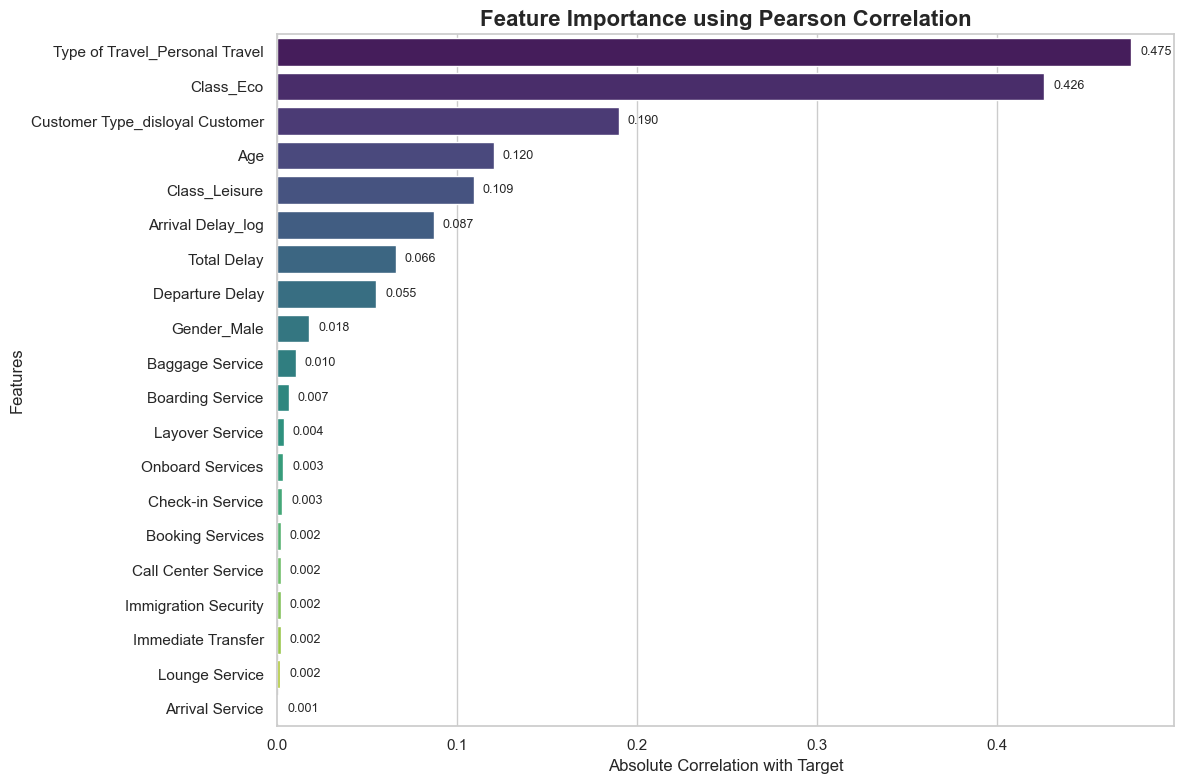

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ---- Step 1: Load Data ----
data = pd.read_csv("scaled_dataset.csv")

# ---- Step 2: Split into Features and Target ----
X = data.drop("Satisfaction_Satisfied", axis=1)
y = data["Satisfaction_Satisfied"]

# Optional: Split for modeling consistency later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---- Step 3: Compute Correlation with Target ----
correlation_scores = X.corrwith(y)

# ---- Step 4: Create Sorted DataFrame ----
corr_df = correlation_scores.abs().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature', 'Correlation']

# ---- Step 5: Plot Feature Importance using Correlation ----
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Barplot
ax = sns.barplot(x="Correlation", y="Feature", data=corr_df, palette="viridis")

# Annotate bars
for i, val in enumerate(corr_df["Correlation"]):
    ax.text(val + 0.005, i, f"{val:.3f}", va='center', fontsize=9)

# Titles and labels
plt.title("Feature Importance using Pearson Correlation", fontsize=16, fontweight='bold')
plt.xlabel("Absolute Correlation with Target", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


#### Combined Visualization with Subplots

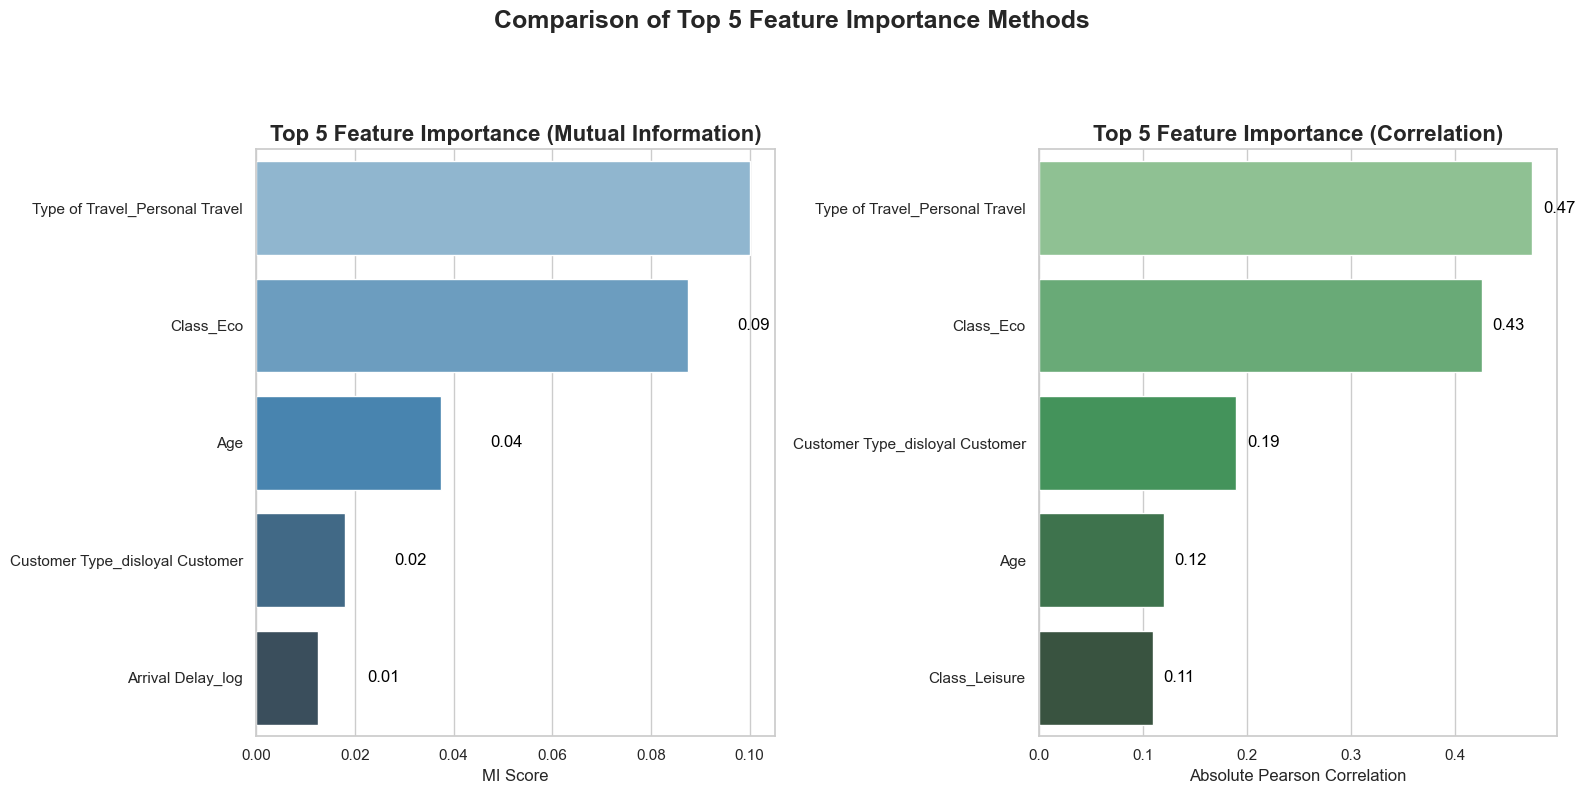

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# ---- Load and Split Data ----
data = pd.read_csv("scaled_dataset.csv")
X = data.drop("Satisfaction_Satisfied", axis=1)
y = data["Satisfaction_Satisfied"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---- Mutual Information Scores ----
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

# ---- Correlation Scores ----
correlation_scores = X.corrwith(y)
corr_df = correlation_scores.abs().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature', 'Correlation']

# ---- Select Top 5 Features ----
mi_top5 = mi_df.head(5)  # Top 5 features from Mutual Information
corr_top5 = corr_df.head(5)  # Top 5 features from Correlation

# ---- Plotting ----
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# --- Subplot 1: Mutual Information (Top 5) ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='MI Score', y='Feature', data=mi_top5, palette='Blues_d')
plt.title('Top 5 Feature Importance (Mutual Information)', fontsize=16, fontweight='bold')
plt.xlabel('MI Score', fontsize=12)
plt.ylabel('')
# Adding values on the bars with an offset for small bars
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate(f'{width:.2f}', (width + 0.01, p.get_y() + p.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black')

# --- Subplot 2: Correlation (Top 5) ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Correlation', y='Feature', data=corr_top5, palette='Greens_d')
plt.title('Top 5 Feature Importance (Correlation)', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Pearson Correlation', fontsize=12)
plt.ylabel('')
# Adding values on the bars with an offset for small bars
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{width:.2f}', (width + 0.01, p.get_y() + p.get_height() / 2), 
                 ha='left', va='center', fontsize=12, color='black')

# --- Common Layout ---
plt.suptitle('Comparison of Top 5 Feature Importance Methods', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Key Insight
* The graph presents a comparison of the top five features influencing customer satisfaction for Ethiopian Airlines, as determined by two different feature importance methods: Mutual Information and Absolute Pearson Correlation. Both methods identify "Type of Travel_Personal Travel" and "Class_Eco" as the most significant predictors of satisfaction. However, the subsequent ranking and the specific features identified differ. Mutual Information highlights "Age," "Customer Type_disloyal Customer," and "Arrival Delay_log" as the next most important, while Absolute Pearson Correlation points to "Customer Type_disloyal Customer," "Age," and "Class_Leisure" as the remaining top contributors. This suggests that while some key features have a consistently strong association with customer satisfaction across both methods, the relative importance and inclusion of other features can vary depending on the analytical approach employed.

#### 2. Wrapper Method

#### 2.1 Recursive Feature Elimination

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed, for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (Logistic Regression for example)
model = LogisticRegression()

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust n_features_to_select as needed

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get the ranking of features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Visualize the feature rankings
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})
feature_rankings = feature_rankings.sort_values(by='Ranking')

Selected Features: Index(['Arrival Delay_log', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Leisure'],
      dtype='object')


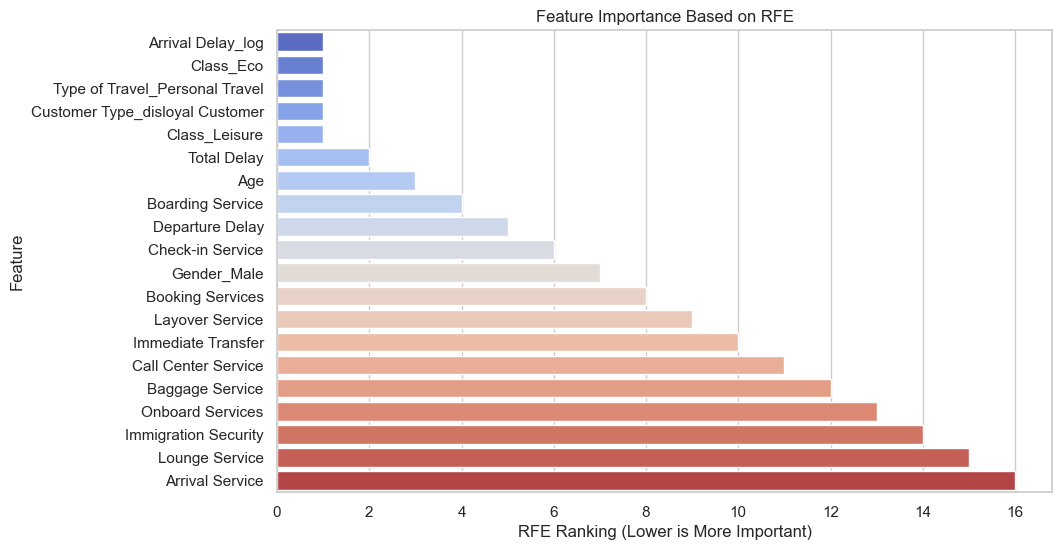

              precision    recall  f1-score   support

       False       0.66      0.64      0.65       972
        True       0.89      0.90      0.89      3028

    accuracy                           0.83      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.83      0.83      0.83      4000



In [17]:
# Plot the feature importance (ranking)
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_rankings, palette='coolwarm')  # Changed palette to 'coolwarm'
plt.title('Feature Importance Based on RFE')
plt.xlabel('RFE Ranking (Lower is More Important)')
plt.ylabel('Feature')
plt.show()

# Evaluate the model on the selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Print the classification report
print(classification_report(y_test, y_pred))


#### RFE + Random Forest

Selected Features: Index(['Age', 'Immediate Transfer', 'Total Delay',
       'Type of Travel_Personal Travel', 'Class_Eco'],
      dtype='object')


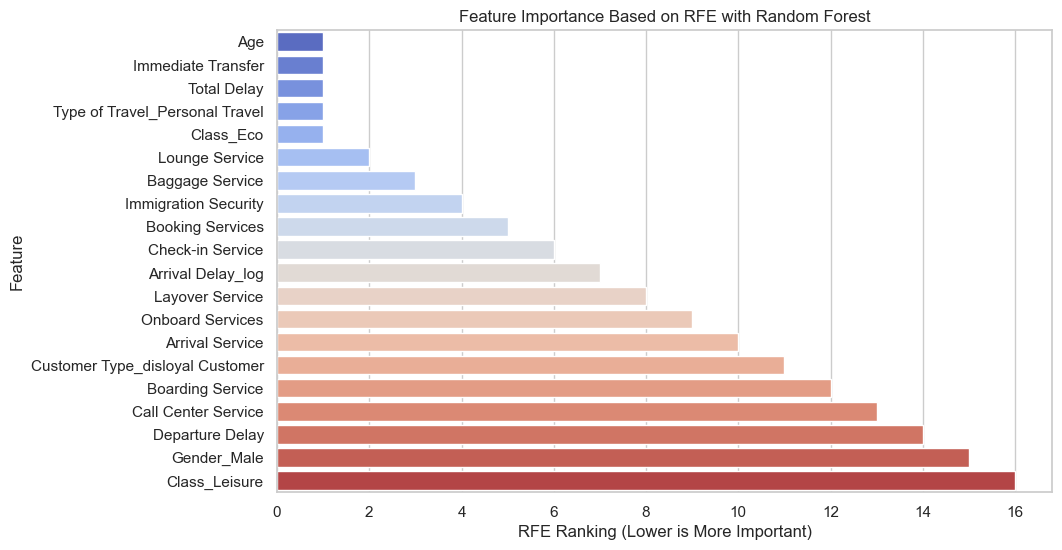

              precision    recall  f1-score   support

       False       0.58      0.50      0.54       972
        True       0.85      0.88      0.86      3028

    accuracy                           0.79      4000
   macro avg       0.71      0.69      0.70      4000
weighted avg       0.78      0.79      0.78      4000



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the Random Forest model
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust n_features_to_select as needed

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Visualize the feature rankings
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})
feature_rankings = feature_rankings.sort_values(by='Ranking')

# Plot the feature importance (ranking)
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_rankings, palette='coolwarm')  # You can choose a different color palette
plt.title('Feature Importance Based on RFE with Random Forest')
plt.xlabel('RFE Ranking (Lower is More Important)')
plt.ylabel('Feature')
plt.show()

# Evaluate the model on the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Print the classification report
print(classification_report(y_test, y_pred))


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

# Load your dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg_model = LogisticRegression()

# RFE with Random Forest
rfe_rf = RFE(estimator=rf_model, n_features_to_select=5)
rfe_rf.fit(X_train, y_train)

# RFE with Logistic Regression
rfe_log_reg = RFE(estimator=log_reg_model, n_features_to_select=5)
rfe_log_reg.fit(X_train, y_train)

# Get the selected features for both models
selected_features_rf = X.columns[rfe_rf.support_]
selected_features_log_reg = X.columns[rfe_log_reg.support_]

# Create a DataFrame to hold the rankings
feature_rankings_rf = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_rf.ranking_
})
feature_rankings_log_reg = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_log_reg.ranking_
})

# Sort by rankings to get top 5 features
feature_rankings_rf = feature_rankings_rf.sort_values(by='Ranking').head(5)
feature_rankings_log_reg = feature_rankings_log_reg.sort_values(by='Ranking').head(5)

# Evaluate both models on the selected features
X_train_selected_rf = X_train[selected_features_rf]
X_test_selected_rf = X_test[selected_features_rf]
X_train_selected_log_reg = X_train[selected_features_log_reg]
X_test_selected_log_reg = X_test[selected_features_log_reg]

# Fit and predict with Random Forest
rf_model.fit(X_train_selected_rf, y_train)
y_pred_rf = rf_model.predict(X_test_selected_rf)

# Fit and predict with Logistic Regression
log_reg_model.fit(X_train_selected_log_reg, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_selected_log_reg)

# Print classification reports for both models
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.50      0.54       972
        True       0.85      0.88      0.86      3028

    accuracy                           0.79      4000
   macro avg       0.71      0.69      0.70      4000
weighted avg       0.78      0.79      0.78      4000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.64      0.65       972
        True       0.89      0.90      0.89      3028

    accuracy                           0.83      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.83      0.83      0.83      4000



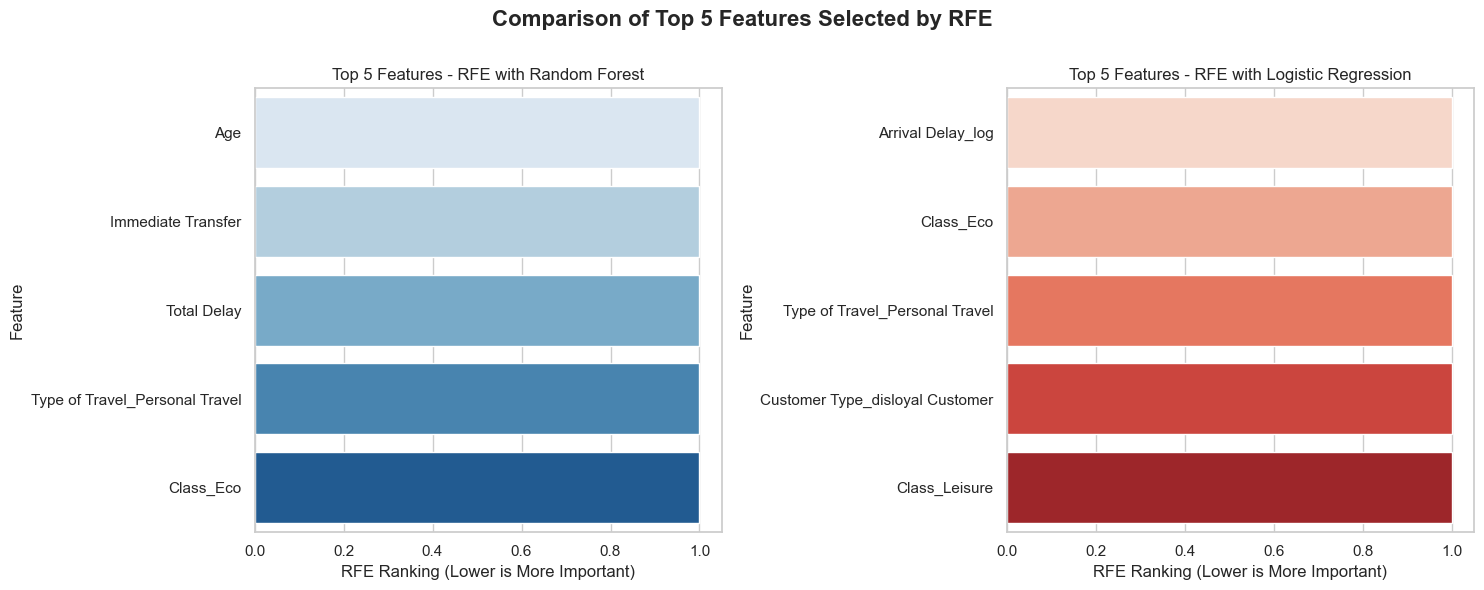

In [24]:
# Plot the top 5 features for both Random Forest and Logistic Regression in subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Random Forest with a different color palette
sns.barplot(x='Ranking', y='Feature', data=feature_rankings_rf, ax=axes[0], palette='Blues')
axes[0].set_title('Top 5 Features - RFE with Random Forest')
axes[0].set_xlabel('RFE Ranking (Lower is More Important)')
axes[0].set_ylabel('Feature')

# Plot for Logistic Regression with a different color palette
sns.barplot(x='Ranking', y='Feature', data=feature_rankings_log_reg, ax=axes[1], palette='Reds')
axes[1].set_title('Top 5 Features - RFE with Logistic Regression')
axes[1].set_xlabel('RFE Ranking (Lower is More Important)')
axes[1].set_ylabel('Feature')

# Add a common title for both subplots
plt.suptitle('Comparison of Top 5 Features Selected by RFE', fontsize=16, fontweight='bold')

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top space to make room for the title

plt.show()


#### Key Insight
* The graph displays the top five features selected for predicting Ethiopian Airlines customer satisfaction using the Recursive Feature Elimination (RFE) method with two different base estimators: Random Forest and Logistic Regression. For RFE with Random Forest, the top five features, ranked from least to most important based on the order of elimination, are "Age," "Immediate Transfer," "Total Delay," "Type of Travel_Personal Travel," and "Class_Eco." In contrast, RFE with Logistic Regression identifies a different set of top five features: "Arrival Delay_log," "Class_Eco," "Type of Travel_Personal Travel," "Customer Type_disloyal Customer," and "Class_Leisure." Notably, "Type of Travel_Personal Travel" and "Class_Eco" appear in the top five for both RFE approaches, suggesting their consistent importance in predicting customer satisfaction, regardless of the underlying model used for feature selection. However, the remaining influential features vary depending on whether Random Forest or Logistic Regression is employed within the RFE framework.

#### 3. Embedded Methods for Feature Selection

Top features selected by Lasso:
              Feature  Coefficient
0                 Age         -0.0
1     Arrival Service          0.0
2    Booking Services          0.0
3  Immediate Transfer          0.0
4      Lounge Service         -0.0


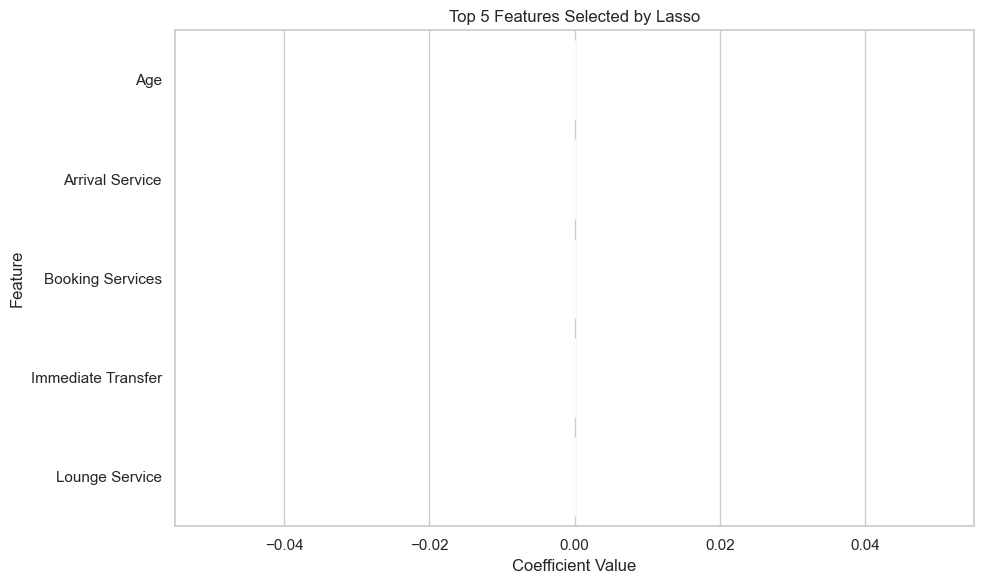

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Load your dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- 1. Lasso Feature Selection -----------
lasso = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso.fit(X_train_scaled, y_train)

# Get the absolute coefficients of features
lasso_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Sort by coefficient magnitude (higher values mean more importance)
lasso_coefs = lasso_coefs.sort_values(by='Coefficient', ascending=False)

# Display the most important features based on Lasso
print("Top features selected by Lasso:")
print(lasso_coefs.head(5))

# Plot Lasso feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefs.head(5), palette='viridis')
plt.title('Top 5 Features Selected by Lasso')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Top features selected by Random Forest:
                            Feature  Importance
17   Type of Travel_Personal Travel    0.171044
0                               Age    0.116726
18                        Class_Eco    0.095393
13                      Total Delay    0.045561
16  Customer Type_disloyal Customer    0.044903


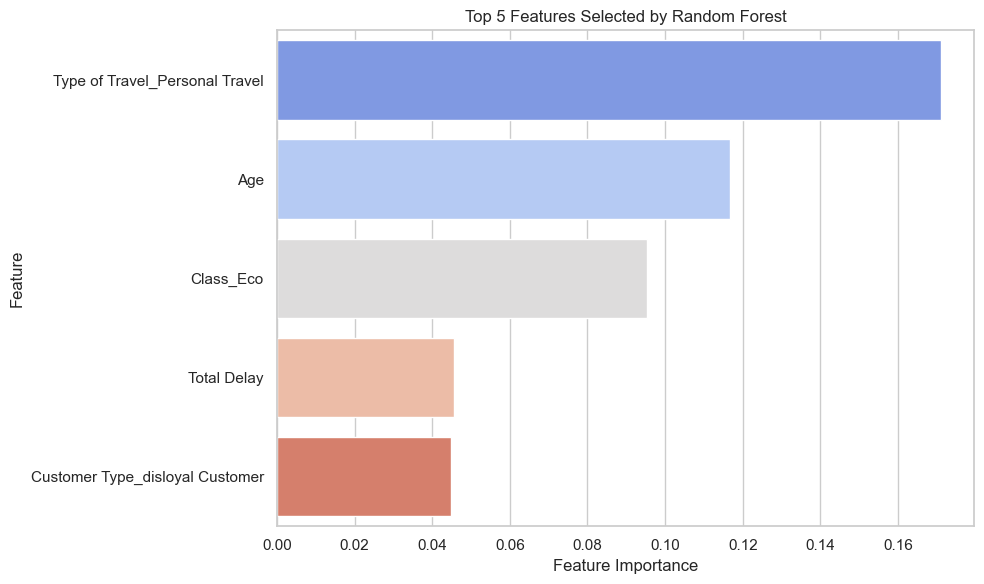

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.60      0.64       972
        True       0.88      0.91      0.89      3028

    accuracy                           0.83      4000
   macro avg       0.78      0.75      0.76      4000
weighted avg       0.83      0.83      0.83      4000

Lasso (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.49      0.53       972
        True       0.84      0.89      0.86      3028

    accuracy                           0.79      4000
   macro avg       0.71      0.69      0.70      4000
weighted avg       0.78      0.79      0.78      4000



In [28]:
# ----------- 2. Random Forest Feature Importance -----------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance (higher values mean more important)
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features based on Random Forest
print("Top features selected by Random Forest:")
print(rf_feature_importances.head(5))

# Plot Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances.head(5), palette='coolwarm')
plt.title('Top 5 Features Selected by Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Evaluate Lasso model (via Logistic Regression with L1 penalty)
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = log_reg_lasso.predict(X_test)
print("Lasso (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_lasso))


#### Plotting top 5 features In Subplots

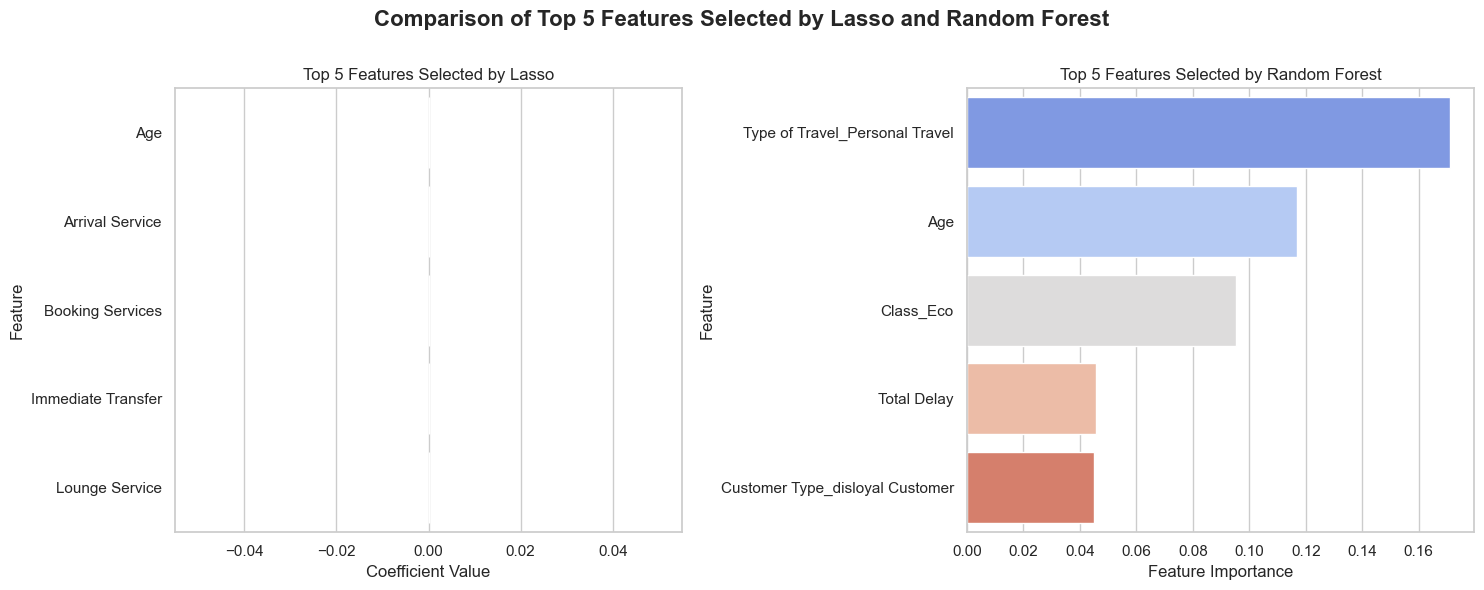

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.60      0.64       972
        True       0.88      0.91      0.89      3028

    accuracy                           0.83      4000
   macro avg       0.78      0.75      0.76      4000
weighted avg       0.83      0.83      0.83      4000

Lasso (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.49      0.53       972
        True       0.84      0.89      0.86      3028

    accuracy                           0.79      4000
   macro avg       0.71      0.69      0.70      4000
weighted avg       0.78      0.79      0.78      4000



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Load your dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- 1. Lasso Feature Selection -----------
lasso = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso.fit(X_train_scaled, y_train)

# Get the absolute coefficients of features
lasso_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Sort by coefficient magnitude (higher values mean more importance)
lasso_coefs = lasso_coefs.sort_values(by='Coefficient', ascending=False)

# ----------- 2. Random Forest Feature Importance -----------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance (higher values mean more important)
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top 5 features for both Lasso and Random Forest in subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Lasso feature importance
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefs.head(5), ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Features Selected by Lasso')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Feature')

# Plot for Random Forest feature importance
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances.head(5), ax=axes[1], palette='coolwarm')
axes[1].set_title('Top 5 Features Selected by Random Forest')
axes[1].set_xlabel('Feature Importance')
axes[1].set_ylabel('Feature')

# Add a common title for both subplots
plt.suptitle('Comparison of Top 5 Features Selected by Lasso and Random Forest', fontsize=16, fontweight='bold')

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top space to make room for the title

plt.show()

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Evaluate Lasso model (via Logistic Regression with L1 penalty)
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = log_reg_lasso.predict(X_test)
print("Lasso (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_lasso))


#### Key Insight
* The graph compares the top five features selected for predicting Ethiopian Airlines customer satisfaction using Lasso regularization and Random Forest feature importance. The left chart, "Top 5 Features Selected by Lasso," is empty, indicating that with the chosen regularization strength, Lasso did not select any of the features as significantly influential for predicting customer satisfaction (all coefficient values are effectively zero). In contrast, the right chart, "Top 5 Features Selected by Random Forest," identifies and ranks five features based on their importance: "Type of Travel_Personal Travel" is the most important, followed by "Age," "Class_Eco," "Total Delay," and "Customer Type_disloyal Customer." This stark contrast suggests that Lasso, with its inherent feature selection property, deemed none of these features as having a substantial linear relationship with customer satisfaction under the applied regularization, while Random Forest, a non-linear model, identified a clear hierarchy of feature importance for prediction.

#### 4. Feature Selection with Random Forest and XGBoost

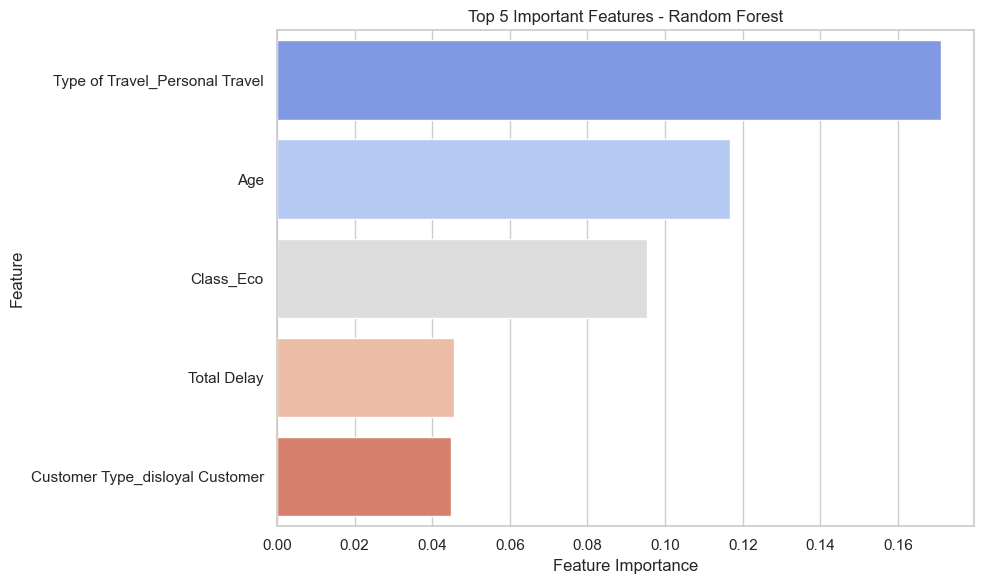

Classification Report using Top 5 Features (Random Forest):
              precision    recall  f1-score   support

       False       0.61      0.55      0.58       972
        True       0.86      0.89      0.87      3028

    accuracy                           0.81      4000
   macro avg       0.74      0.72      0.73      4000
weighted avg       0.80      0.81      0.80      4000



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Make sure path is correct
X = dataset.drop('Satisfaction_Satisfied', axis=1)
y = dataset['Satisfaction_Satisfied']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(5), palette='coolwarm')
plt.title('Top 5 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Select top 5 features
top_features = feat_imp_df['Feature'].head(5).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train again using only top 5 features
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train)
y_pred = rf_top.predict(X_test_top)

# Classification report
print("Classification Report using Top 5 Features (Random Forest):")
print(classification_report(y_test, y_pred))


#### XGBoost for Feature Selection

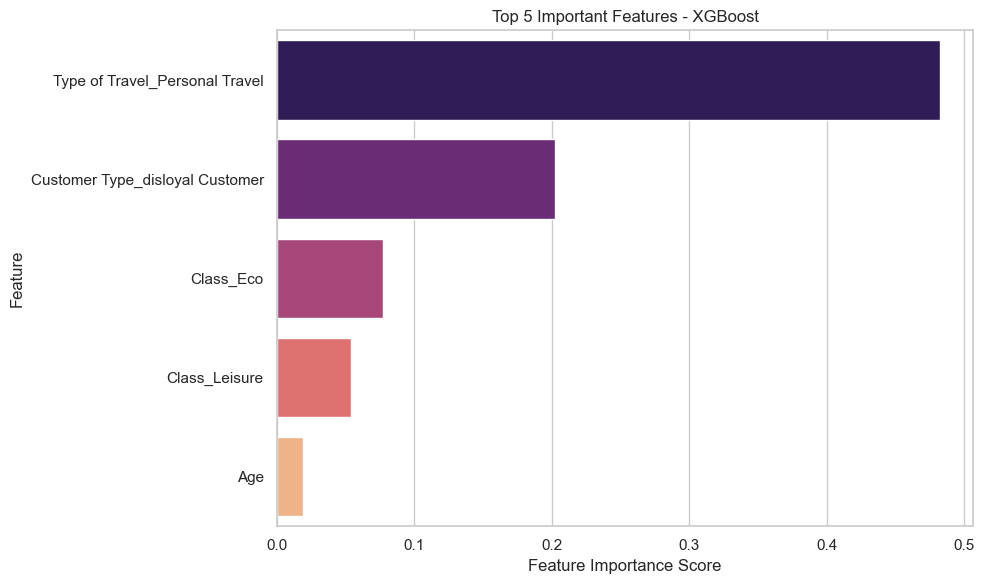

Classification Report using Top 5 Features (XGBoost):
              precision    recall  f1-score   support

       False       0.67      0.62      0.64       972
        True       0.88      0.90      0.89      3028

    accuracy                           0.83      4000
   macro avg       0.78      0.76      0.77      4000
weighted avg       0.83      0.83      0.83      4000



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Adjust the path if necessary
X = dataset.drop('Satisfaction_Satisfied', axis=1)
y = dataset['Satisfaction_Satisfied']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(5), palette='magma')
plt.title('Top 5 Important Features - XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Select top 5 features
top_features = feat_imp_df['Feature'].head(5).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain and evaluate using top 5 features
xgb_top = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_top.fit(X_train_top, y_train)
y_pred = xgb_top.predict(X_test_top)

# Classification report
print("Classification Report using Top 5 Features (XGBoost):")
print(classification_report(y_test, y_pred))


#### Feature Importance with XGBoost and Random Forest (Subplot)

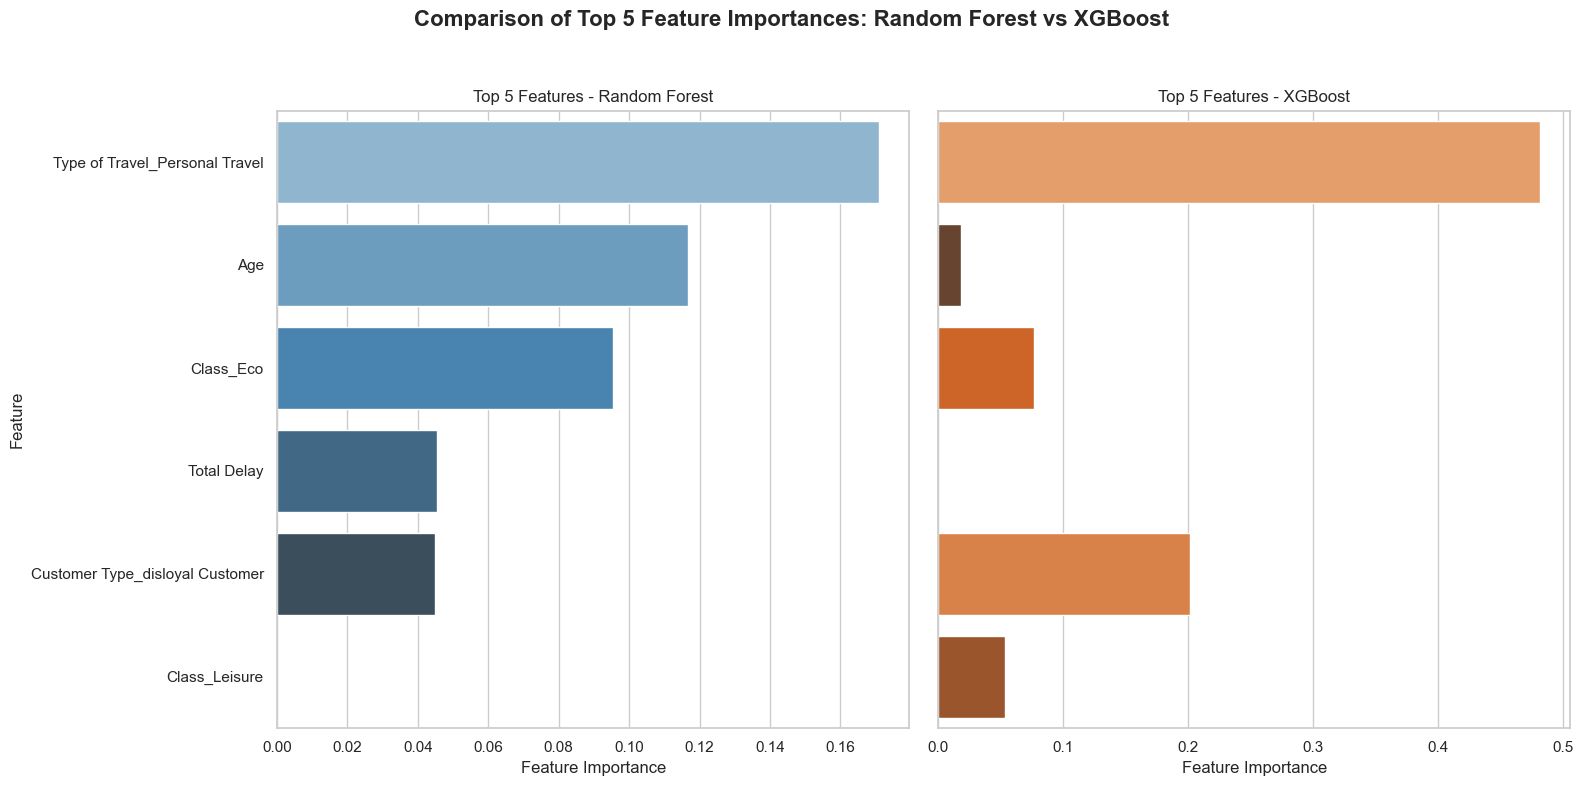

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')  # Adjust the path if needed
X = dataset.drop('Satisfaction_Satisfied', axis=1)
y = dataset['Satisfaction_Satisfied']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- Random Forest -----------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ----------------- XGBoost -----------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ----------------- Plotting -----------------
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Random Forest Plot
sns.barplot(x='Importance', y='Feature', data=rf_importances.head(5), ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 Features - Random Forest')
axes[0].set_xlabel('Feature Importance')
axes[0].set_ylabel('Feature')

# XGBoost Plot
sns.barplot(x='Importance', y='Feature', data=xgb_importances.head(5), ax=axes[1], palette='Oranges_d')
axes[1].set_title('Top 5 Features - XGBoost')
axes[1].set_xlabel('Feature Importance')
axes[1].set_ylabel('')  # Remove redundant y-axis label

# Common title
plt.suptitle('Comparison of Top 5 Feature Importances: Random Forest vs XGBoost', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Key Insight
* The Graph presents a comparison of the top five features influencing Ethiopian Airlines customer satisfaction as determined by Random Forest and XGBoost models. The left chart shows the feature importances from a Random Forest model, ranking "Type of Travel_Personal Travel" as the most important, followed by "Age," "Class_Eco," "Total Delay," and "Customer Type_disloyal Customer." The right chart displays the feature importances from an XGBoost model, which also identifies "Type of Travel_Personal Travel" as the most significant predictor, but the subsequent ranking and included features differ. XGBoost highlights "Customer Type_disloyal Customer," "Class_Eco," "Age," and "Class_Leisure" as the next most important. While "Type of Travel_Personal Travel," "Age," and "Class_Eco" appear in the top five for both models, their relative importance varies, and XGBoost includes "Class_Leisure" instead of "Total Delay" in its top five. This suggests that while both models recognize some common key drivers of customer satisfaction, they weigh the importance of other factors differently based on their underlying algorithms.

#### 5. Feature Selection Using SHAP and LIME

#### 5.1 SHAP Feature Importance with XGBoost (Top 5 Features)

 99%|===================| 15872/16000 [00:56<00:00]        

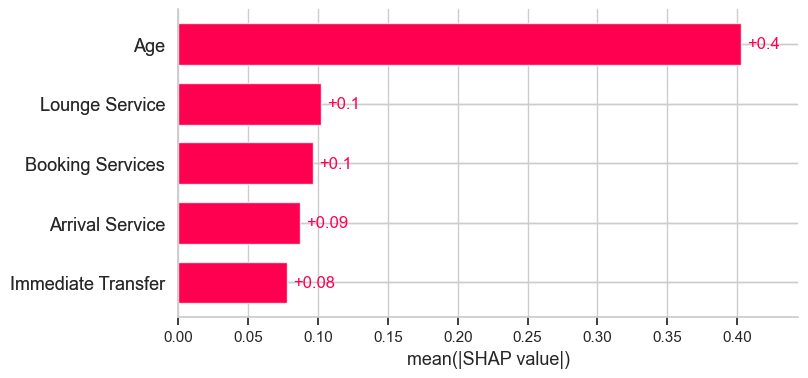

In [36]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')

# Target and features
y = dataset['Satisfaction_Satisfied']
X = dataset.drop('Satisfaction_Satisfied', axis=1)

# 1. Convert object columns to categorical dummies
X = pd.get_dummies(X, drop_first=True)

# 2. Ensure all data is numeric and cast to float (required by XGBoost/SHAP)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Plot SHAP bar chart of top 5 features
shap.plots.bar(shap_values[:, :5], max_display=5)


#### 5.2 Feature Importance with XGBoost using LIME

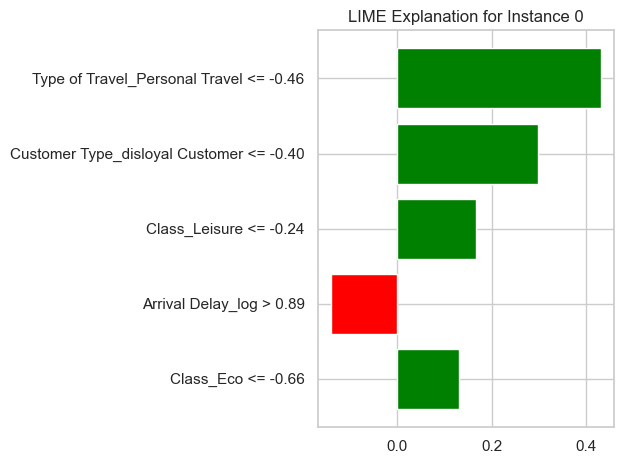

In [40]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# 1. Load dataset
dataset = pd.read_csv('scaled_dataset.csv')
y = dataset['Satisfaction_Satisfied']
X = dataset.drop('Satisfaction_Satisfied', axis=1)

# 2. One-hot encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the data (LIME performs better when data is normalized)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

# 7. Choose an instance to explain (e.g., first instance in test set)
i = 0  # change index to analyze different instances
exp = explainer.explain_instance(X_test_scaled[i], model.predict_proba, num_features=5)

# 8. Show explanation
# Instead, just use the matplotlib figure
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {i}")
plt.tight_layout()
plt.show()

#### Subplot

 95%|=================== | 3811/4000 [00:14<00:00]       

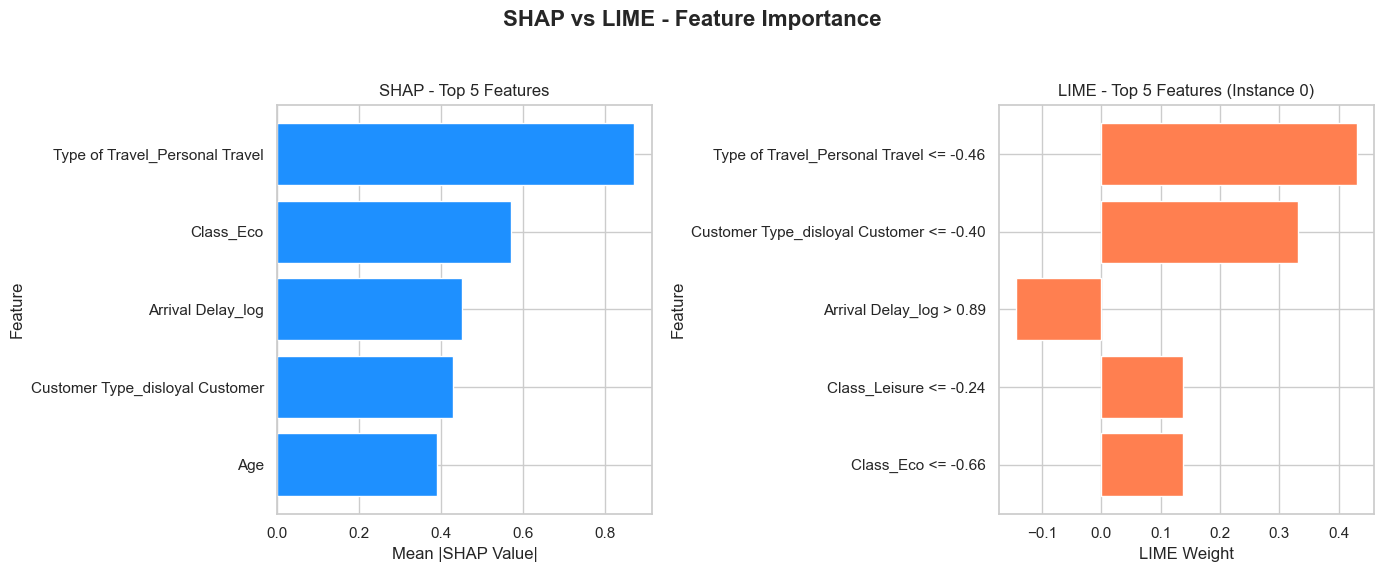

In [41]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')
y = dataset['Satisfaction_Satisfied']
X = dataset.drop('Satisfaction_Satisfied', axis=1)

# One-hot encode if needed (optional, depends on your dataset)
X = pd.get_dummies(X, drop_first=True)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# SHAP: Compute values
explainer_shap = shap.Explainer(model, X_train_scaled)
shap_values = explainer_shap(X_test_scaled)

# SHAP bar values (global)
shap_values_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False).head(5)

# LIME: Explain one instance
explainer_lime = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

instance_index = 0
lime_exp = explainer_lime.explain_instance(
    X_test_scaled[instance_index], 
    model.predict_proba, 
    num_features=5
)

lime_values = lime_exp.as_list()
lime_df = pd.DataFrame(lime_values, columns=['Feature', 'Importance'])

# Plot both using subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# SHAP bar plot
axes[0].barh(shap_values_df['Feature'][::-1], shap_values_df['Importance'][::-1], color='dodgerblue')
axes[0].set_title("SHAP - Top 5 Features")
axes[0].set_xlabel("Mean |SHAP Value|")
axes[0].set_ylabel("Feature")

# LIME bar plot
axes[1].barh(lime_df['Feature'][::-1], lime_df['Importance'][::-1], color='coral')
axes[1].set_title(f"LIME - Top 5 Features (Instance {instance_index})")
axes[1].set_xlabel("LIME Weight")
axes[1].set_ylabel("Feature")

plt.suptitle("SHAP vs LIME - Feature Importance", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Key Insight
* The image compares the top five features influencing Ethiopian Airlines customer satisfaction as determined by SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations). The left chart, "SHAP - Top 5 Features," displays the global feature importance, indicating that "Type of Travel_Personal Travel" has the highest mean absolute SHAP value, followed by "Class_Eco," "Arrival Delay_log," "Customer Type_disloyal Customer," and "Age." These SHAP values represent the average impact each feature has on the model's output across the entire dataset.

* The right chart, "LIME - Top 5 Features (Instance 0)," shows the local feature importance for a single, unspecified instance (Instance 0). LIME provides explanations for individual predictions by approximating the model locally with a more interpretable linear model. For this particular instance, the most influential factor pushing the prediction in one direction is "Type of Travel_Personal Travel" being less than or equal to -0.46 (the original value was likely normalized or centered). Other important factors for this instance include "Customer Type_disloyal Customer" being less than or equal to -0.40, "Arrival Delay_log" being greater than 0.89, "Class_Leisure" being less than or equal to -0.24, and "Class_Eco" being less than or equal to -0.66."

* In summary, while SHAP provides a global understanding of feature importance across all predictions, LIME offers a local explanation for a specific prediction. Although "Type of Travel_Personal Travel" appears as a significant feature in both, the other top features and their specific impact can differ between the global SHAP analysis and the local LIME explanation for a particular instance. LIME also provides insights into the direction and magnitude of a feature's influence for that specific prediction.